In [54]:
# all import statements will go here
import pandas as pd
import numpy as np

In [55]:
# read in the csv of data and make sure it was imported correctly 
df = pd.read_csv('NFL.csv', header=[0])
df.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


In [56]:
# remove all players from the data set that are not drafted
df = df[df['Drafted..tm.rnd.yr.'].notna()]

# we need to add a column that classifies a player as a day 1,2, 3, player where NA means the player will not be drafted
df['Day_Drafted'] = 0

# now determine which day each player was drafted based on the roung they were drafted
for index, row in df.iterrows():
    tuple = row['Drafted..tm.rnd.yr.']
    tuple = tuple.split('/')
    tuple[1] = tuple[1].strip()
    if tuple[1] == '1st':
        df.loc[index, 'Day_Drafted'] = 1
        continue
    if tuple[1] == '2nd' or tuple[1] == '3rd':
        df.loc[index, 'Day_Drafted'] = 2
    else:
        df.loc[index, 'Day_Drafted'] = 3

In [57]:
# we will utilize median in order to fill in unavailable data 
# Because a lot of data is relative to the position the player plays, we will take the median of the players at their position 

# create dataframes for each position

# offensive line data frame
oline = df.loc[df['Position_Type'] == 'offensive_lineman']
dline = df.loc[df['Position_Type'] == 'defensive_lineman']
db = df.loc[df['Position_Type'] == 'defensive_back']
# the backs_receivers group is too broad, must use exact position in order to narrow down results
rb = df.loc[df['Position'] == 'RB']
lb = df.loc[df['Position_Type'] == 'line_backer']

# we are going to group WR and TE togehter because they are most similar 
wr = df.loc[df['Position'] == 'WR']
te = df.loc[df['Position'] == 'TE']

# merge the two data frames into one 
off_skill = pd.concat([wr, te, rb], axis=0)


# create list of all dataframe
dfs = [oline, dline, db, lb, off_skill]

# list of irrelevant columns for analysis
drop_cols = ['Year', 'Player', 'School', 'Drafted..tm.rnd.yr.', 'Player_Type', 'Position_Type', 'Position', 'Drafted']

# remove all irrelevant columns
for i in range(len(dfs)):
    for j in range(len(drop_cols)):
        dfs[i].drop(drop_cols[j], 1, inplace=True) 
        
oline.head()

/tmp/ipykernel_28752/3299842869.py:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfs[i].drop(drop_cols[j], 1, inplace=True)
/home/wavyj/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Day_Drafted
2,24.0,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,41.005821,3
5,23.0,1.9304,139.252858,5.28,NaN,29.0,NaN,NaN,NaN,37.368830,3
7,21.0,2.0320,140.160042,5.32,55.88,19.0,238.76,7.87,4.88,33.945078,3
12,22.0,1.9304,140.160042,5.16,77.47,21.0,261.62,7.81,4.60,37.612275,1
20,22.0,1.9050,138.345673,5.33,77.47,23.0,261.62,NaN,4.52,38.121995,2


In [58]:
# We will input all NaN values in the table 
# now we need to begin calculating the median value for each category in each position
# drop irrelevant attributes like bmi, school, etc. since we have already split up the data by position

# a list of all relevant attributes measured that impact draft position at the combine
attributes = ['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'BMI']

# get the median value of each position group for the columns specified above
# I can do this somewhat algorithmically 
for frame in dfs:
    for j in range(len(attributes)):
        tmp = frame.iloc[:, j-1]
        median = tmp.median(0, skipna=True)
        frame[attributes[j-1]] = frame[attributes[j-1]].fillna(median)

oline.head()

/tmp/ipykernel_28752/1972008941.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[attributes[j-1]] = frame[attributes[j-1]].fillna(median)
/tmp/ipykernel_28752/1972008941.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[attributes[j-1]] = frame[attributes[j-1]].fillna(median)
/tmp/ipykernel_28752/1972008941.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Day_Drafted
2,24.0,2.0066,165.107623,5.50,71.12,21.0,259.08,7.77,4.72,41.005821,3
5,23.0,1.9304,139.252858,5.28,71.12,29.0,259.08,7.77,4.72,37.368830,3
7,21.0,2.0320,140.160042,5.32,55.88,19.0,238.76,7.87,4.88,33.945078,3
12,22.0,1.9304,140.160042,5.16,77.47,21.0,261.62,7.81,4.60,37.612275,1
20,22.0,1.9050,138.345673,5.33,77.47,23.0,261.62,7.77,4.52,38.121995,2


In [59]:
# split our data into test and train
from sklearn.model_selection import train_test_split

y = off_skill.loc[:,'Day_Drafted']

# drop irrelevant features
tmp = off_skill.drop(['Day_Drafted'], axis=1)

# split theh data
X_train, X_test, y_train, y_test = train_test_split(tmp, y, test_size=.8)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc. transform(X_test)

# create classifier
knn = KNeighborsClassifier(n_neighbors=13)

# train the model using the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)


from sklearn import metrics
print("**** Original offensive skill group dataset ****")
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**** Original offensive skill group dataset ****
Train Accuracy: 0.664
Accuracy: 0.5208747514910537


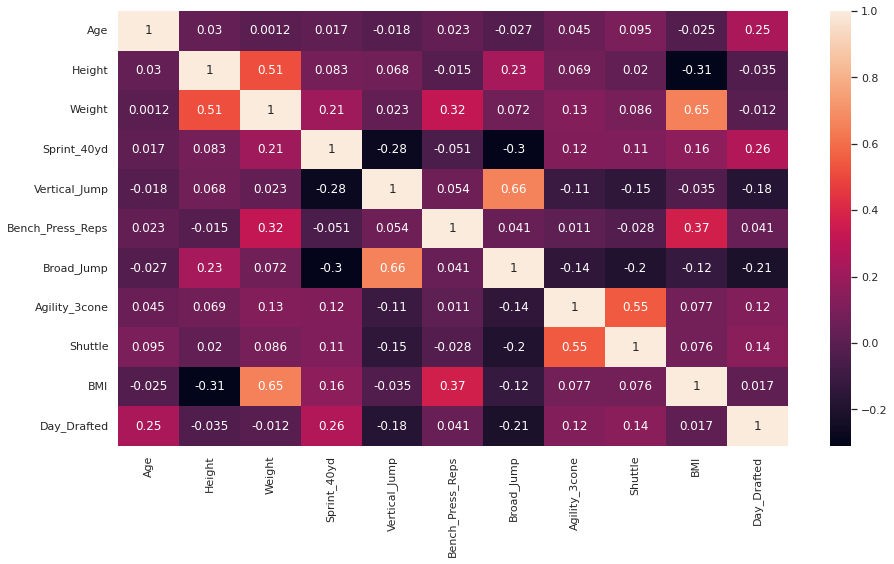

In [61]:
# create a heat map using seaborne to see feature correlation
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(rc= {'figure.figsize':(15,8)})
dataplot = sb.heatmap(db.corr(), annot=True)
plt.show()

In [62]:
# lets try again but utilizing correclations given in the heat map above
# we will try using the 5 most correlated features

tmp = off_skill.drop(['Day_Drafted', 'Height', 'Weight', 'Vertical_Jump', 'Broad_Jump', 'Bench_Press_Reps'], axis=1)
y = off_skill.loc[:,'Day_Drafted']
tmp.head()

,Age,Sprint_40yd,Agility_3cone,Shuttle,BMI
34,22.0,4.34,6.81,4.15,25.801998
36,21.0,4.44,6.98,4.40,27.705876
49,22.0,4.51,6.98,4.26,27.705876
51,21.0,4.46,6.72,4.19,26.122941
60,22.0,4.50,6.98,4.26,26.359879


In [63]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(tmp, y, test_size=.8)

sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc. transform(X_test)

# create classifier
knn = KNeighborsClassifier(n_neighbors=13)

# train the model using the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)


from sklearn import metrics
print("**** Altered offensive skill group with some features removed ****")
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**** Altered offensive skill group with some features removed ****
Train Accuracy: 0.64
Accuracy: 0.5606361829025845


In [64]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(tmp, y, test_size=.8)

sc = StandardScaler().fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# create classifier
knn = KNeighborsClassifier(n_neighbors=13)

# train the model using the training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)


from sklearn import metrics
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.592
Accuracy: 0.4552683896620278


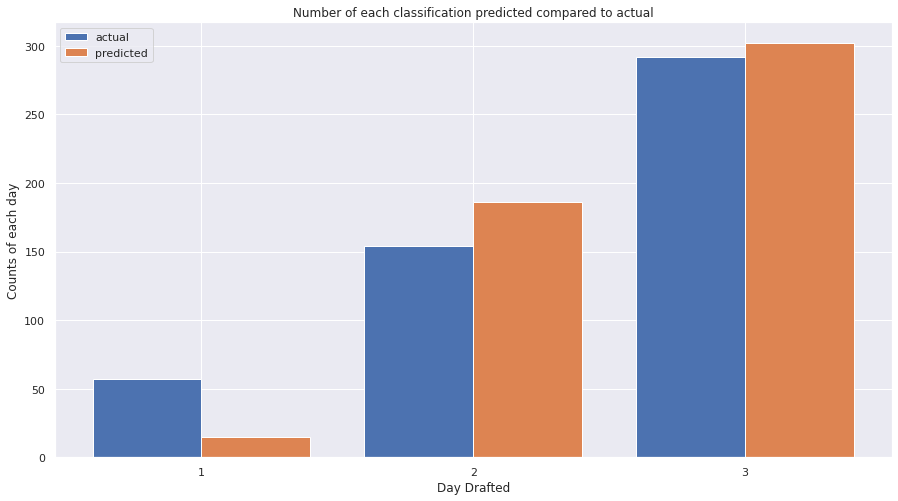

In [65]:
# lets graph our different accuracies
# we will use our training set to graph accuracy because this has more data, which typically leads to better results in KNN

# count values of day 1 2 3 in thid predict 

X = ['1', '2', '3']

# find number of actual day 1 2 3 picks for the data we picked
actual_counts = y_test.value_counts()
actual = []
for i in range(3):
    actual.append(actual_counts.get(i+1))


# calculate the number of each group we predicted 
(unique, predicted) = np.unique(y_pred, return_counts=True)

pred = []
for val in predicted:
    pred.append(val)


# graph the results on a bar graph
X_axis = np.arange(len(X))
plt.bar(X_axis - .2, actual, .4, label ='actual')
plt.bar(X_axis + .2, pred, .4, label='predicted')
plt.xticks(X_axis, X)
plt.xlabel("Day Drafted")
plt.ylabel("Counts of each day")
plt.title("Number of each classification predicted compared to actual")
plt.legend()
plt.show()

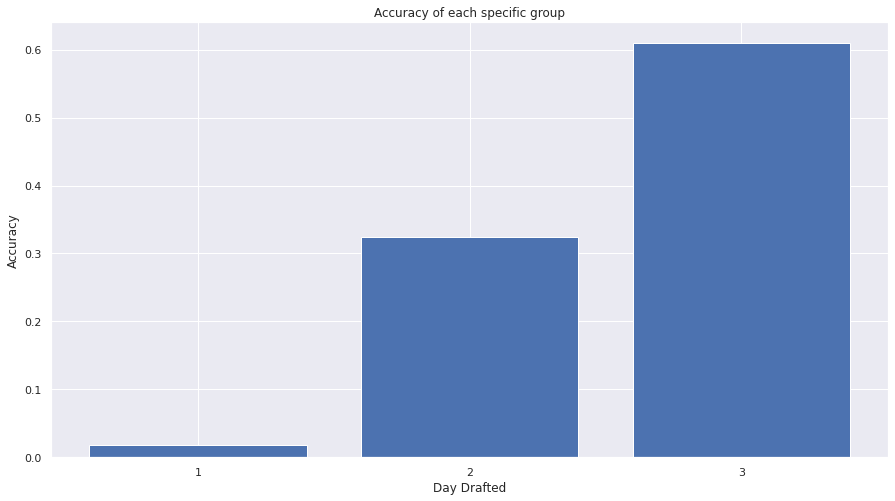

In [66]:
# now lets show a graph of the accuracy per draft group when it comes to actually classifying individuals

accuracy = []
correct = [0, 0, 0]
totals = [0, 0, 0]

pred = y_pred
actual = np.array(y_test)

for i in range(len(pred)):
    if pred[i] == actual[i]:
        if pred[i] == 1:
            correct[0] += 1
            totals[0] += 1
        if pred[i] == 2:
            correct[1] += 1
            totals[1] += 1
        if pred[i] == 3:
            correct[2] += 1
            totals[2] += 1
    else:
        if actual[i] == 1:
            totals[0] += 1
        if actual[i] == 2:
            totals[1] += 1
        if actual[i] == 3:
            totals[2] += 1


for i in range(3):
    accuracy.append(correct[i] / totals[i])
    
    
X_axis = np.arange(len(X))
plt.bar(X_axis, accuracy)
plt.xticks(X_axis, X)
plt.xlabel("Day Drafted")
plt.ylabel("Accuracy")
plt.title("Accuracy of predicitng each specific group")
plt.show()

Summary of all the data above:

We first split the data into position groups who's data will be most similar because they are going into the NFL at the same position, so when the data is normalized it will be adjusted and compared against players with similar ranges for athletic ability. We addressed the issue of NaN values by finding the median of a position group so that a player will be assigned an 'average' value for players similar to their position.

The tests above were all done using the offensive skill group which consists of RBs, WRs, and TEs

The next step was to begin implementing a KNN model using sci-kit learn where we used all relevant numerical attributes that had been normalized by column to classify players based on the day they are drafted in the NFL. I found that I was able to get the best and most reproducable results using KNN when I used 11 as my value for the number of neighbors. The model produced between 56-64% accuracy on a consistent basis for my offensive skill group. We created a heat map to see the correlation between features and draft day, and we removed and featrues that had a negative or extremely low correlation from the offensive skill group dataframe. We tested this altered data set and we ended up getting marginally different result that did not improve our model in any significant way. The test accuracy was about 10% lower for every test due to the fact that it has significantly lower number of data points, and the fact that this is an imbalanced data set since our classification will consist of Day 3 picks being 3/7 of our dataset, Day 2 being 2/7, and Day 1 being only 1/7 of our data's classification. This means that it would be expectedd that we would predict Day 3 better than both, and we would classify Day 2 better than Day 1. The solution suggested to me was to take a dataset that consists of 50 of all 3 classification types and then randomly split that dataset to get the results. 

We created two graphs:
    - The first graph shows the number of each type of classification inside of our training split from our data compared to how many of each classifications we predicted using our model. Clearly the day 3 picks were being classified at a much higher rate than the other 2 possibilites. The Day 2 picks were classified at a relatively correct rate compared to how many were actually in the dataset. The main issue is that we are consistinely classifying only 0-15 first round picks in our model when in reality there are typically around 50 in our training dataset after the dataset has been split. This means that we are not predicting high end prospects in any way. 
    - The second graph shows our accuracies of predicting each specific group. We predict Day 3 picks at a good rate, but it progressivley worse as we look at the 2 other minor groups (Day 1 and Day 2 picks). This really highlights the shortcomings of our model as we are not classifying high end prospects at any reasonable rate. 

Below, we will test this type of dataset against a KNN model in order to see if we can predict day 1 and 2 picks at a significatnly higher rate than our current model. 